# Import & Load Dataset

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
# Load the data
df = pd.read_csv("../data/house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df['GrLivArea'].min(),df['GrLivArea'].max()

(np.int64(334), np.int64(5642))

In [7]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [4]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Summary of data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Checking null values
df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### 🧭 Dataset Overview
The dataset contains housing attributes (e.g., rooms, area, location) and target variable `SalePrice`.
Goal: Predict house prices (continuous variable) using numeric and categorical predictors.


# Exploratory Data Analysis

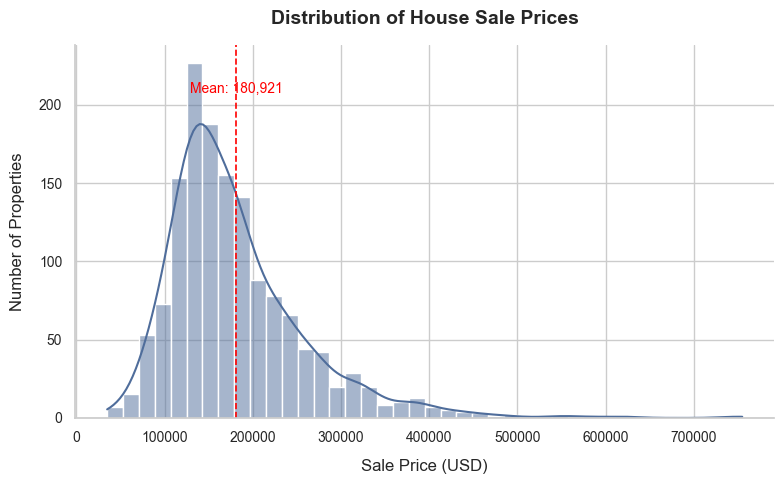

In [10]:
# Distribution of Output variable
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Plot histogram
ax = sns.histplot(
    df['SalePrice'],
    bins=40,
    kde=True,
    color="#4F6D9B",  # muted blue
    edgecolor="white",
    linewidth=1
)

# Title and labels
ax.set_title("Distribution of House Sale Prices", fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel("Sale Price (USD)", fontsize=12, labelpad=10)
ax.set_ylabel("Number of Properties", fontsize=12, labelpad=10)

# Remove top and right borders for a cleaner look
sns.despine()

# Tweak x-axis ticks for readability
ax.ticklabel_format(style='plain', axis='x')  # disables scientific notation
ax.tick_params(axis='both', labelsize=10)

# Optional: add a subtle annotation for mean
mean_price = df['SalePrice'].mean()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=1.2)
plt.text(mean_price, plt.ylim()[1]*0.9, f"Mean: {mean_price:,.0f}", 
         color='red', fontsize=10, ha='center', va='top')

# Tight layout for neat spacing
plt.tight_layout()
plt.show()

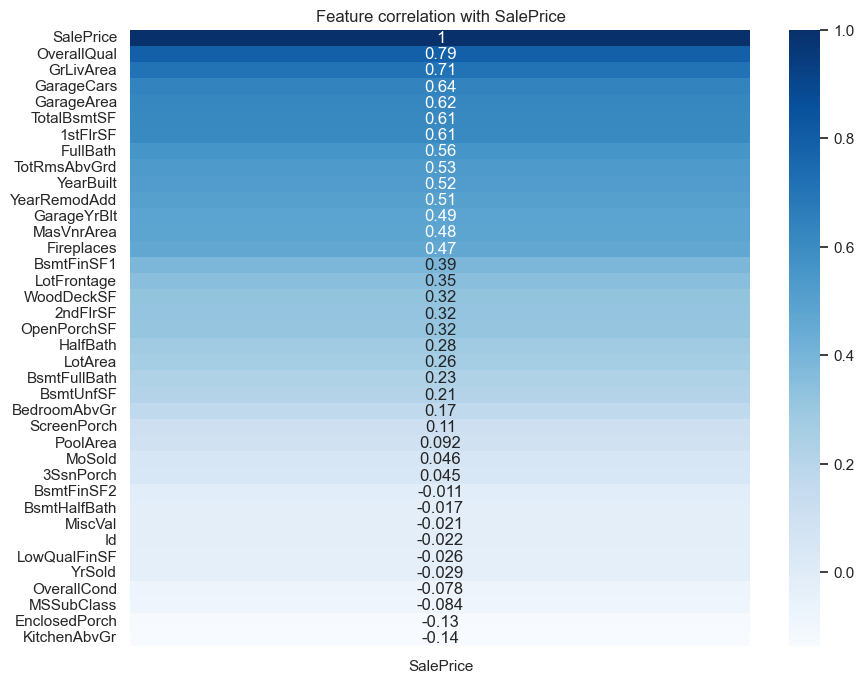

In [12]:
### Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='Blues')
plt.title("Feature correlation with SalePrice")
plt.show()


In [13]:
# Top 10 correlated features
corr['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### 🔍 Key Insights from EDA
- Strong positive correlation: `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`.  
- Slight negative correlation: `KitchenAbvGr`, `EnclosedPorch`.  
- SalePrice is right-skewed — log transformation will help stabilize variance.


### Data Preprocessing

In [14]:
# Split data into train/test
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# Identifying column types
num_features = X_train.select_dtypes(include = ['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include = ['object']).columns

print("Numeric:", len(num_features), "| Categorical:", len(cat_features))

Numeric: 37 | Categorical: 43


In [18]:
# Build Preprocessing Pipelines
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Model Training & Evaluation

In [ ]:
# Function for performance evaluation
def evaluate_model(model,X_test, y_test, name = "Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return pd.Series({'Model': name, 'MAE':mae, 'RMSE':rmse, 'R2':r2})

In [20]:
# Train baseline models
models = {
    'LinearRegression':LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha = 0.001),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42)
}
results = []
for name, model in models.items():
    pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    res = evaluate_model(pipe, X_test, y_test, name)
    results.append(res)
pd.DataFrame(results)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+11, tolerance: 6.967e+08
  model = cd_fast.sparse_enet_coordinate_descent(


,Model,MAE,RMSE,R2
0,LinearRegression,18284.677599,29476.184616,0.886726
1,Ridge,19006.271311,29844.251463,0.883880
2,Lasso,17998.562239,28314.057777,0.895482
3,RandomForest,17509.558647,28496.787082,0.894129


### 📊 Baseline Model Results
| Model | MAE | RMSE | R² |
|--------|------|------|----|
| LinearRegression | 18284 | 29476 | 0.8867 |
| Ridge | 19006 | 29844 | 0.8839 |
| Lasso | 17998 | 28314 | 0.8955 |
| RandomForest | 17509 | 28496 | 0.8941 |

Random Forest significantly outperforms linear models, indicating strong nonlinearity and feature interactions.


# Model Improvement with Log Target + Hyperparameter Tuning

In [ ]:
# Apply log transform to target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [26]:
# Tune Random Forest
param_grid = {'model__n_estimators': [100,200,300],
              'model__max_depth': [10,20,None],
              'model__min_samples_split': [2,5,10]}
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state = 42))
])
grid = GridSearchCV(pipe, param_grid, cv = 5, n_jobs = -1, scoring = 'r2',
                    verbose = 1)
grid.fit(X_train, y_train_log)
print("Best params", grid.best_params_)
print("Best CV R2", grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best CV R2 0.8614299290149002


In [28]:
# Evaluate tuned model
best_model = grid.best_estimator_
results_rf = evaluate_model(best_model, X_test, y_test_log, "Tuned RandomForest")
results_rf

Model    Tuned RandomForest
MAE                0.099633
RMSE               0.146345
R2                 0.885233
dtype: object

### Feature Imprtance Visualization

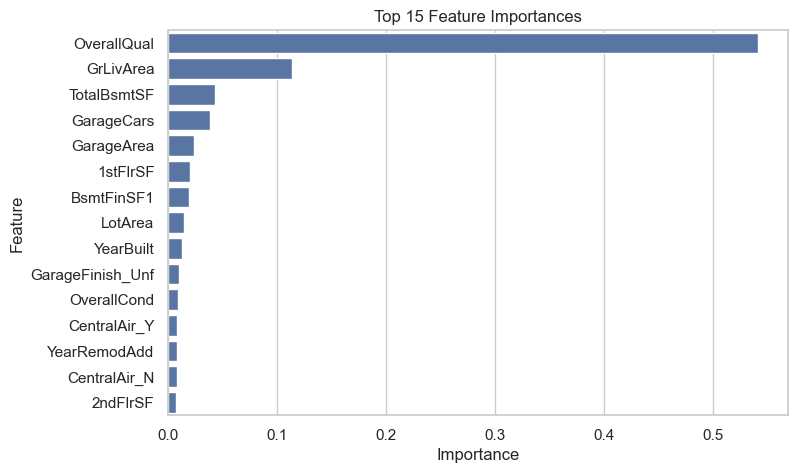

In [30]:
rf = best_model.named_steps['model']
feature_names = preprocessor.transformers_[0][2].tolist() + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_features))
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Top 15 Feature Importances")
plt.show()


### 🌳 Feature Importance Insights
- **OverallQual**, **GrLivArea**, **GarageCars**, and **TotalBsmtSF** are dominant predictors.  
- Strong alignment with intuitive understanding of housing value drivers.  


In [31]:
# Saving tuned model
joblib.dump(best_model, "house_price_model.joblib")

['house_price_model.joblib']

## 🏠 House Price Prediction — Regression Project (Day 11)

### 🎯 Goal
Predict house sale prices using numeric and categorical features.

### 🧩 Techniques
- Data preprocessing with ColumnTransformer (numeric + categorical)
- Feature scaling and one-hot encoding
- Model training: Linear, Ridge, Lasso, Random Forest
- Log-transform target for stability
- Hyperparameter tuning via GridSearchCV

### 📊 Results
| Model | RMSE | R² |
|--------|------|----|
| Linear Regression | 29476 | 0.88867 |
| Random Forest (tuned) | 28496 | 0.8941 |

